In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.arange(1,11) * (100 + np.random.randn(10))
y = 2 * x + np.random.randn(10)*5
X = np.vstack((x,y))
print(X)

[[ 100.5849456   199.11314144  302.92924366  399.44464956  504.86035376
   603.22693504  692.09728466  792.73468496  899.16728148  983.03643326]
 [ 196.70932032  399.30985091  603.32958098  785.76239386 1011.32623601
  1206.21520528 1387.80983293 1585.2468633  1797.3464827  1964.6386063 ]]


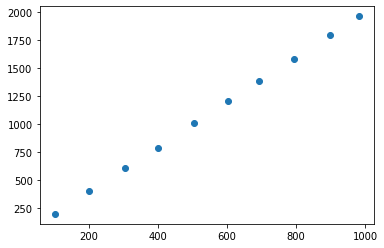

In [3]:
plt.scatter(X[0], X[1])
plt.show()

In [5]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())
print(Xcentered)
print("Mean vector: ", m)

(array([-447.13454974, -348.6063539 , -244.79025169, -148.27484578,
        -42.85914158,   55.5074397 ,  144.37778932,  245.01518962,
        351.44778613,  435.31693792]), array([-897.06011694, -694.45958635, -490.43985628, -308.0070434 ,
        -82.44320125,  112.44576802,  294.04039567,  491.47742604,
        703.57704544,  870.86916904]))
Mean vector:  (547.7194953410569, 1093.7694372597211)


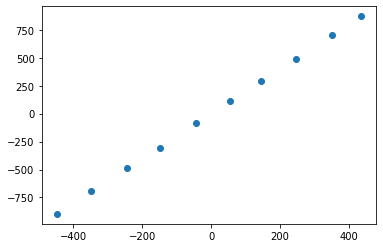

In [6]:
plt.scatter(Xcentered[0], Xcentered[1])
plt.show()

In [10]:
X.T.shape

(10, 2)

In [11]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 89130.57185014 178660.69356259]
 [178660.69356259 358141.67523453]] 

Variance of X:  89130.57185013939
Variance of Y:  358141.67523452936
Covariance X and Y:  178660.6935625875


In [12]:
_, vecs = np.linalg.eig(covmat)
v = vecs[:,1]
Xnew = np.dot(v, Xcentered)
print(Xnew)

[1002.32033181  777.04359147  548.13639411  341.80493367   92.90525689
 -125.39876571 -327.5674552  -549.16525936 -786.47061923 -973.60840844]


In [16]:
Xnew

array([1002.32033181,  777.04359147,  548.13639411,  341.80493367,
         92.90525689, -125.39876571, -327.5674552 , -549.16525936,
       -786.47061923, -973.60840844])

In [13]:
v, v.shape

(array([-0.44639745, -0.8948348 ]), (2,))

In [14]:
Xcentered

(array([-447.13454974, -348.6063539 , -244.79025169, -148.27484578,
         -42.85914158,   55.5074397 ,  144.37778932,  245.01518962,
         351.44778613,  435.31693792]),
 array([-897.06011694, -694.45958635, -490.43985628, -308.0070434 ,
         -82.44320125,  112.44576802,  294.04039567,  491.47742604,
         703.57704544,  870.86916904]))

In [24]:
m

(553.1054930777199, 1106.2473923267544)

In [15]:
n = 8     #номер элемента случайной величины
Xrestored = np.dot(Xnew[n],v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Restored:  [ 898.79797548 1797.53071475]
Original:  [ 899.16728148 1797.3464827 ]


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(X))

In [19]:
for xn, x_pca in zip(Xnew, XPCAreduced):
    print(xn, '-', x_pca[0], '=', np.abs(xn - x_pca[0]))

1002.320331808979 - 1002.3203318089784 = 5.684341886080801e-13
777.0435914675134 - 777.0435914675131 = 2.2737367544323206e-13
548.1363941120626 - 548.1363941120622 = 3.410605131648481e-13
341.80493366609073 - 341.8049336660906 = 1.1368683772161603e-13
92.9052568903985 - 92.90525689039848 = 2.842170943040401e-14
-125.39876571131063 - -125.39876571131056 = 7.105427357601002e-14
-327.56745519723034 - -327.5674551972302 = 1.7053025658242404e-13
-549.1652593594291 - -549.1652593594289 = 2.2737367544323206e-13
-786.4706192328831 - -786.4706192328829 = 2.2737367544323206e-13
-973.608408444189 - -973.6084084441886 = 3.410605131648481e-13
